## Basics of Neural Network Programming
DeepLearning.ai - Course 1 - Week 2 - Andrew Ng

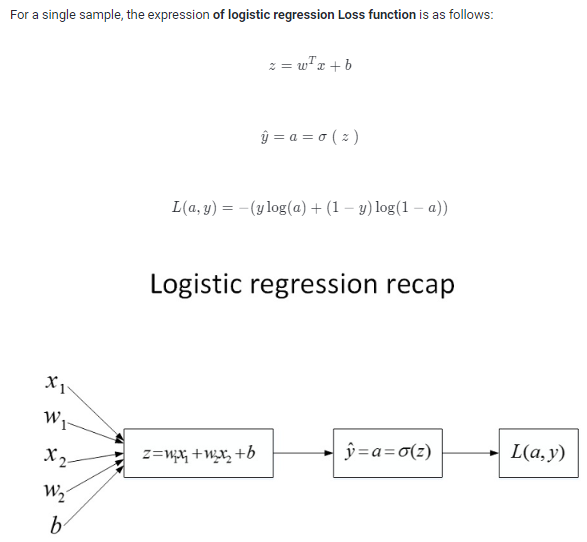

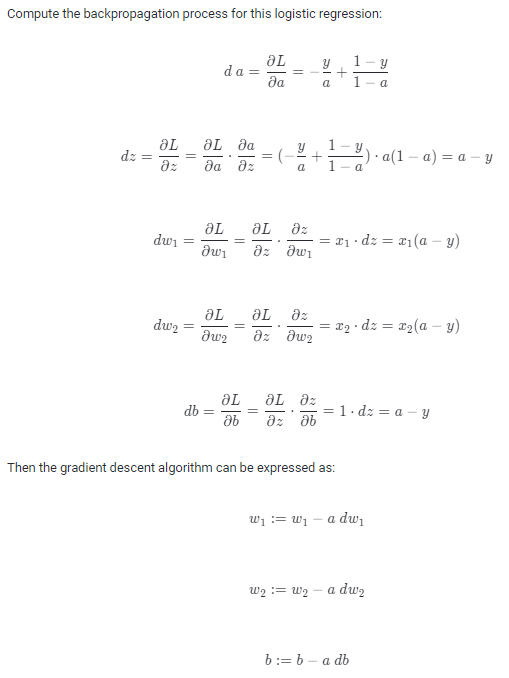

### Gradient Descent on m Examples

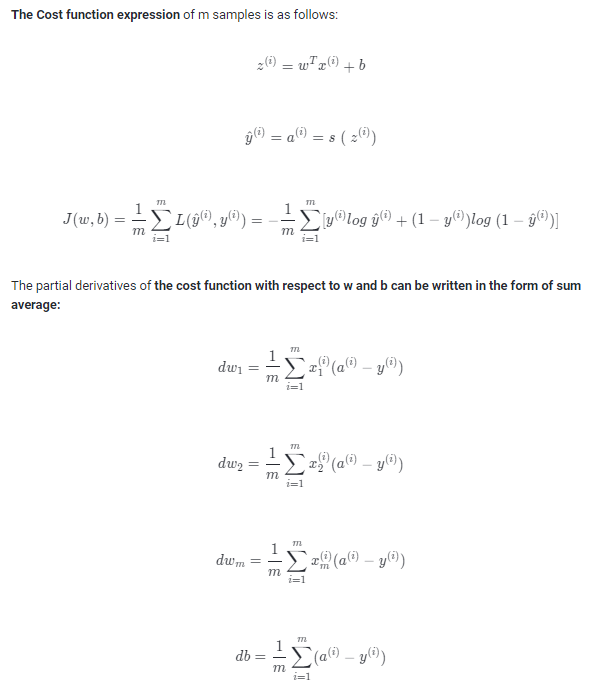

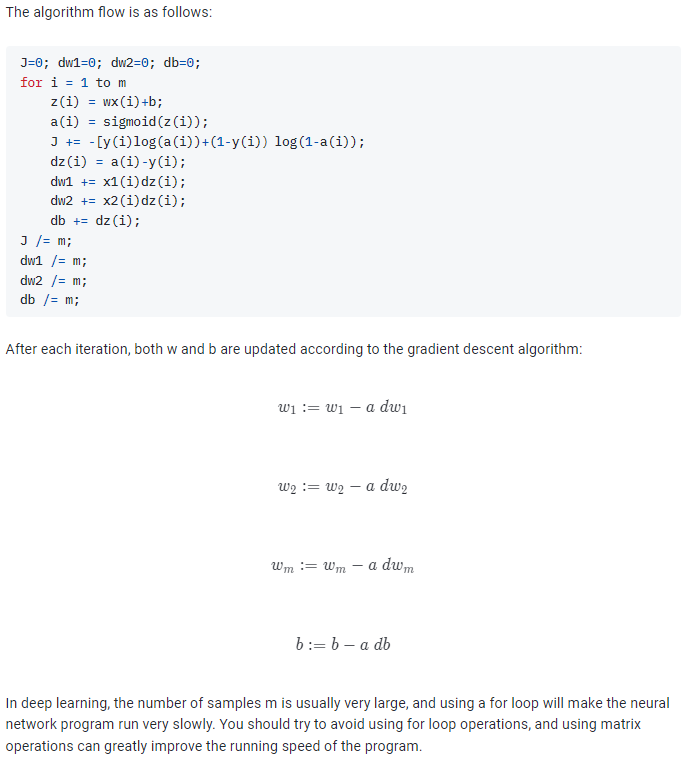

### Vectorizing 

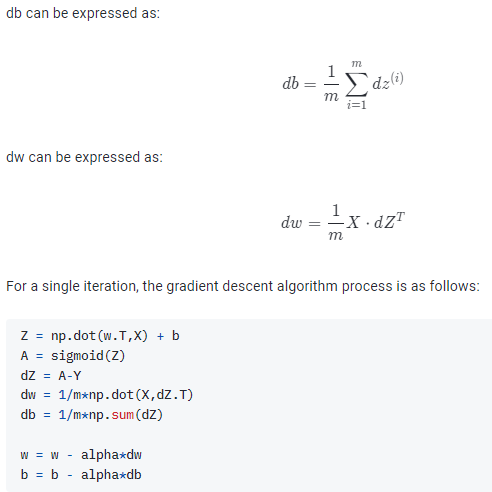

In [ ]:
import numpy as np
import time

In [ ]:
m = 10; n_x = 3   # 10 samples, 3 features
w = np.random.randn(3)
x = np.random.randn(m, n_x)
z = np.dot(x, w)

In [54]:
x = np.random.randn(10, 3)
x

array([[-0.86387165,  1.26502121,  0.34459079],
       [ 0.24755579, -0.20070483,  1.14975924],
       [ 1.40844788, -1.30099899,  2.01199963],
       [ 0.59979031, -0.06213635,  0.15856176],
       [-2.08481877,  0.3015889 ,  0.96952132],
       [ 0.28849064, -0.19237807,  1.4304911 ],
       [-2.21165714, -1.00742185,  0.051715  ],
       [ 0.601446  , -1.16373532, -0.05189413],
       [-0.34348457,  1.8009016 ,  0.03314901],
       [-0.75267837,  1.63618703, -2.32566104]])

In [55]:
w = np.random.randn(3)
w

array([ 0.01406593, -0.95953755,  1.87261636])

In [56]:
w = w.reshape((3, 1))
w

array([[ 0.01406593],
       [-0.95953755],
       [ 1.87261636]])

In [57]:
np.dot(x, w)

array([[-0.58070016],
       [ 2.34912388],
       [ 5.03587193],
       [ 0.36498413],
       [ 1.49683069],
       [ 2.86741291],
       [ 1.03239244],
       [ 1.02792985],
       [-1.67078877],
       [-5.93564094]])

In [37]:
# if we write x as column vector: 1 column is 1 sample
x.T.shape

(3, 10)

In [ ]:
import pandas as pd

In [63]:
pd.DataFrame(x.T)

,0,1,2,3,4,5,6,7,8,9
0,-0.863872,0.247556,1.408448,0.599790,-2.084819,0.288491,-2.211657,0.601446,-0.343485,-0.752678
1,1.265021,-0.200705,-1.300999,-0.062136,0.301589,-0.192378,-1.007422,-1.163735,1.800902,1.636187
2,0.344591,1.149759,2.012000,0.158562,0.969521,1.430491,0.051715,-0.051894,0.033149,-2.325661


In [58]:
X = x.T

In [61]:
w.T

array([[ 0.01406593, -0.95953755,  1.87261636]])

In [59]:
np.dot(w.T, X)

array([[-0.58070016,  2.34912388,  5.03587193,  0.36498413,  1.49683069,
         2.86741291,  1.03239244,  1.02792985, -1.67078877, -5.93564094]])

### Broadcasting in python

In [52]:
# Broadcasting: when you add b to np.dot(w.T, x), python will automatically expand it out to match the
# dimension, i.e. [[b, b, b, ..., b]]
b = np.random.rand(1)
b

array([0.74842891])

In [65]:
Z = np.dot(w.T, X) + b
Z

array([[ 0.16772875,  3.09755279,  5.78430084,  1.11341303,  2.24525959,
         3.61584181,  1.78082134,  1.77635875, -0.92235986, -5.18721203]])

In [83]:
food = {'Apples': [56.0, 1.2, 1.8], 'Beef': [0.0, 104.0, 135.0], 'Eggs': [4.4, 52.0, 99.0], 'Potatoes': [68.0, 8.0, 0.9]}
df = pd.DataFrame(food, index=['Carb', 'Protein', 'Fat'])

In [84]:
df

,Apples,Beef,Eggs,Potatoes
Carb,56.0,0.0,4.4,68.0
Protein,1.2,104.0,52.0,8.0
Fat,1.8,135.0,99.0,0.9


In [90]:
# Broadcasting example
# calculate % of Calories from Carb, Protein, Fat for each type of food
tot_carb = df.sum(axis=0).values
tot_carb

array([ 59. , 239. , 155.4,  76.9])

In [92]:
A = df.values
A

array([[ 56. ,   0. ,   4.4,  68. ],
       [  1.2, 104. ,  52. ,   8. ],
       [  1.8, 135. ,  99. ,   0.9]])

In [94]:
cal = A.sum(axis=0)
cal

array([ 59. , 239. , 155.4,  76.9])

In [96]:
cal = cal.reshape(1, 4)
cal

array([[ 59. , 239. , 155.4,  76.9]])

In [97]:
percentage = 100 * A / cal
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

In [99]:
100 * A / A.sum(axis=0)

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

In [13]:
a = np.random.randn(1000000)
b = np.random.randn(1000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()
print(c)
print('Vectorized version:' + str(1000*(toc-tic)) + 'ms')

c = 0
tic = time.time()
for i in range(1000000):
    c += a[i] * b[i]
toc = time.time()
print(c)
print('Explicit for loop:' + str(1000*(toc-tic)) + 'ms')

991.6617247148282
Vectorized version:1.0323524475097656ms
991.6617247147983
Explicit for loop:602.764368057251ms


**SIMD** (Single Instruction Multiple Data): parallelization instruction. np.dot enables python numpy to take advantage of parallelization.

In [15]:
np.zeros((5, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Vectorizing logistic regression's gradient computation

In [ ]:
# forward pass
Z = np.dot(w.T, X) + b
A = sigmoid(Z)

# backward pass
dZ = A - Y
dw = (1/m) * np.dot(X, dZ.T)
db = (1/m) * np.sum(dZ)

w = w - alpha * dw
b = b - alpha * db

In [66]:
Z.shape

(1, 10)

In [67]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(Z))
    return A

In [68]:
A = sigmoid(Z)

In [80]:
Y = np.random.choice(2, 10).reshape(1, -1)

In [81]:
dZ = A - Y

In [82]:
np.dot(X, dZ.T)

array([[ 3.11607559],
       [ 0.59933554],
       [-2.51631312]])

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

In [109]:
# Don't use rank 1 array, commit to making a column vector (5, 1) or a row vector (1, 5)
a = np.random.randn(5)
print('This is a rank 1 array:')
print('a.shape = ', a.shape)
a

This is a rank 1 array:
a.shape =  (5,)


array([-1.2198838 , -0.37496059,  1.65838728, -0.05664494, -2.03835462])

In [104]:
row_vector = np.random.randn(1, 5)
row_vector

array([[-0.5380215 , -1.04646655, -0.39647229,  0.52668852,  0.84260615]])

In [105]:
col_vector = np.random.randn(5, 1)
col_vector

array([[-0.31774119],
       [ 0.15443389],
       [-0.76957731],
       [-0.29897487],
       [ 1.41157009]])

### Logistic Regression with a Neural Network Mindset
We will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuition about deep learning.

* h5py: h5py is a common package to interact with a dataset that is stored on an H5 file
* PIL and scipy are used here to test the model with your own picture at the end

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [2]:
def load_dataset():
    train_data = h5py.File('train_catvnoncat.h5', 'r')
    train_set_x_orig = np.array(train_data['train_set_x'][:])   # train set features
    train_set_y_orig = np.array(train_data['train_set_y'][:])   # train set labels

    test_data = h5py.File('test_catvnoncat.h5', 'r')
    test_set_x_orig = np.array(test_data['test_set_x'][:])      # test set features
    test_set_y_orig = np.array(test_data['test_set_y'][:])      # test set labels

    classes = np.array(test_data['list_classes'][:])            # the list of classes

    train_set_y = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])   # reshape into a row vector
    test_set_y = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])      # reshape into a row vector

    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

In [116]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [117]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [162]:
train_set_y.shape

(1, 209)

In [163]:
test_set_y.shape

(1, 50)

In [159]:
# # Example of a picture
# index = np.random.choice(200, 1)[0]
# plt.imshow(train_set_x_orig[index])
# print("It's a " + classes[train_set_y[:, index]][0].decode('utf-8'))

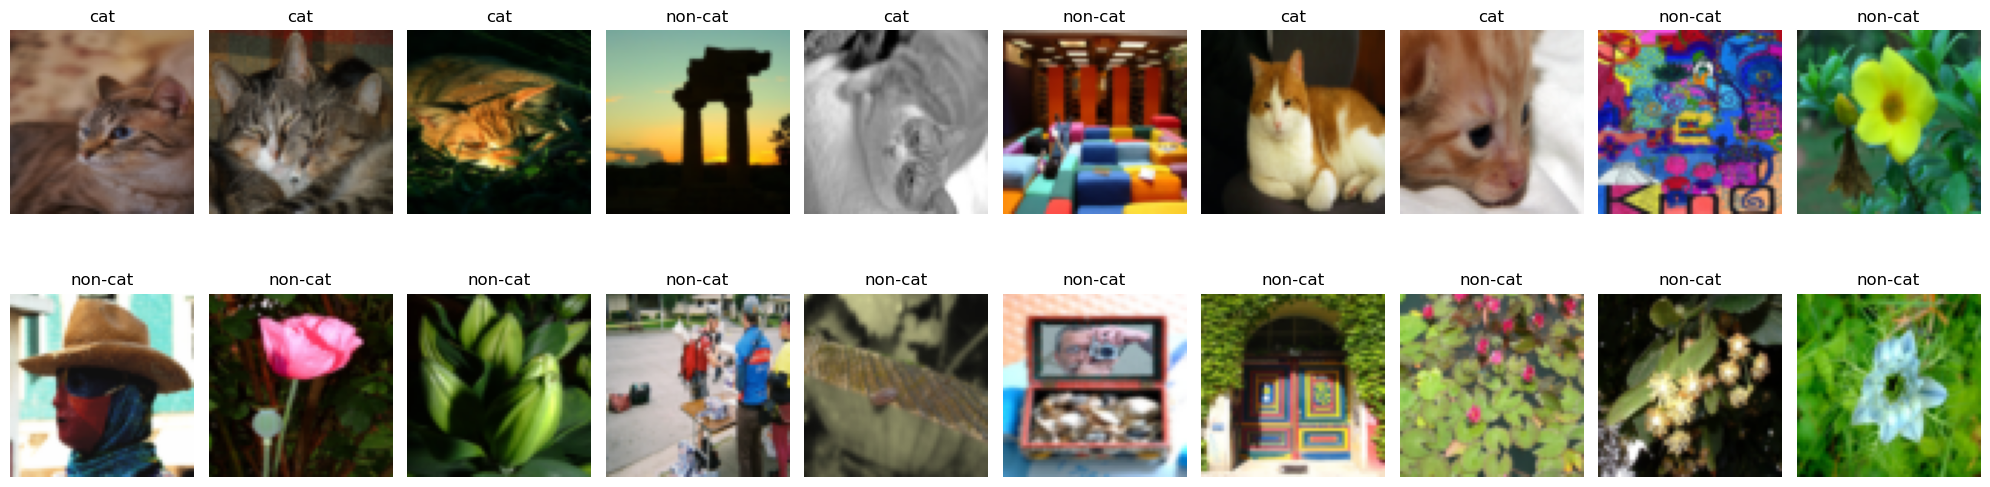

In [161]:
indices = np.random.choice(200, 20)
plt.figure(figsize=(20, 6))
for i, index in enumerate(indices):
    plt.subplot(2, 10, i+1)
    plt.imshow(train_set_x_orig[index])
    plt.title(str(classes[train_set_y[:, index]][0].decode('utf-8')))
    plt.axis('off')
plt.tight_layout()

Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  num_px  3, 1).

In [8]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x_flatten.shape

(12288, 209)

In [26]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [31]:
# each column is an image
pd.DataFrame(train_set_x)

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.066667,0.768627,0.321569,0.003922,0.035294,0.329412,0.219608,0.074510,0.247059,0.090196,...,0.113725,1.000000,0.168627,0.400000,0.364706,0.784314,0.035294,0.560784,0.086275,0.031373
1,0.121569,0.752941,0.278431,0.086275,0.035294,0.309804,0.223529,0.086275,0.266667,0.184314,...,0.196078,1.000000,0.223529,0.619608,0.435294,0.784314,0.043137,0.607843,0.094118,0.109804
2,0.219608,0.745098,0.266667,0.007843,0.019608,0.196078,0.090196,0.007843,0.239216,0.043137,...,0.113725,1.000000,0.105882,0.415686,0.560784,0.800000,0.050980,0.647059,0.090196,0.207843
3,0.086275,0.756863,0.349020,0.003922,0.039216,0.329412,0.203922,0.090196,0.250980,0.098039,...,0.278431,1.000000,0.270588,0.345098,0.388235,0.780392,0.031373,0.721569,0.090196,0.054902
4,0.129412,0.729412,0.325490,0.054902,0.035294,0.309804,0.215686,0.101961,0.266667,0.196078,...,0.352941,1.000000,0.329412,0.588235,0.462745,0.780392,0.047059,0.745098,0.098039,0.129412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,0.000000,0.321569,0.580392,0.239216,0.062745,0.149020,0.145098,0.039216,0.035294,0.247059,...,0.094118,0.203922,0.494118,0.788235,0.000000,0.862745,0.015686,0.423529,0.019608,0.000000
12284,0.000000,0.321569,0.596078,0.101961,0.039216,0.086275,0.035294,0.015686,0.023529,0.050980,...,0.043137,0.101961,0.509804,0.627451,0.000000,0.921569,0.000000,0.592157,0.000000,0.000000
12285,0.000000,0.321569,0.541176,0.007843,0.066667,0.219608,0.086275,0.027451,0.027451,0.141176,...,0.054902,0.274510,0.278431,0.423529,0.000000,0.729412,0.019608,0.333333,0.015686,0.000000
12286,0.000000,0.313725,0.552941,0.231373,0.121569,0.137255,0.145098,0.031373,0.035294,0.250980,...,0.113725,0.180392,0.392157,0.803922,0.000000,0.901961,0.015686,0.419608,0.019608,0.000000


It's time to design a simple algorithm to distinguish cat images from non-cat images.
You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why Logistic Regression is actually a very simple Neural Network!

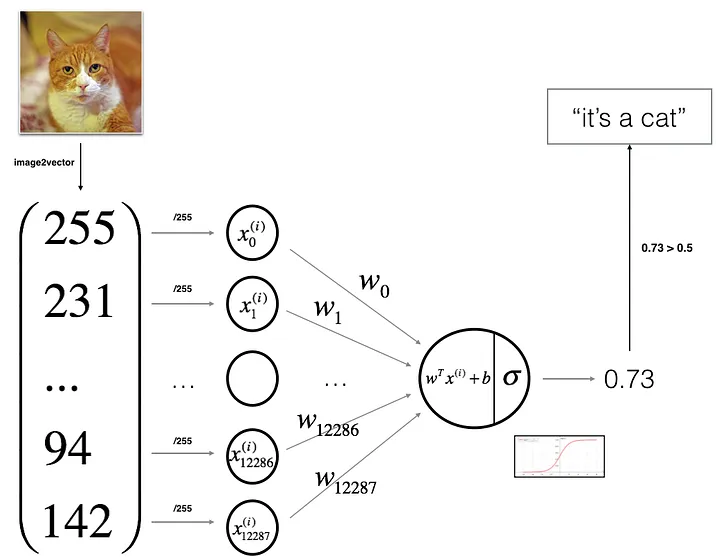

In [92]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

In [138]:
def initialize_with_zeros(dim):
    """
    Creates a vector of zeros of shape (dim, 1) for w and initialize b to zero
    Arguments: dim: the size of the w vector (or the number of parameters in this case)
    Returns: w of shape (dim, 1) and b (initialized scalar)
    """
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [20]:
dim = 64*64*3
w, b = initialize_with_zeros(dim)

In [23]:
w.shape

(12288, 1)

In [24]:
w[:3, :]

array([[0.],
       [0.],
       [0.]])

In [27]:
train_set_x.shape

(12288, 209)

In [94]:
# forward and backward propagation
def propagate(w, b, X, Y):
    """
    X: image data of shape (n_px * n_px * 3, n_samples)
    """
    m = X.shape[1]    # get the number of samples
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    eps = 1e-10
    cost = - (Y * np.log(A + eps) + (1 - Y) * np.log((1 - A) + eps))
    cost = cost.sum() / m

    dZ = A - Y
    
    dw = np.dot(X, dZ.T)
    dw = dw / m
    
    db = np.sum(dZ)
    db = db / m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [29]:
w.T

array([[0., 0., 0., ..., 0., 0., 0.]])

In [95]:
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.80153988679877


Write down the optimization function. The goal is to learn w and b by minimizing the cost function J. For a parameter $\theta$, the update rule is $\theta = \theta - \alpha \partial\theta$, where $\alpha$ is the learning rate.

In [213]:
def optimize(w, b, X, Y, n_iters, learning_rate, print_cost=False):
    costs = []
    for i in range(n_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print('Cost after iteration %d: %f' % (i, cost))

    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [108]:
params, grads, costs = optimize(w, b, X, Y, n_iters= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.801540
Cost after iteration 10: 5.196701
Cost after iteration 20: 4.595964
Cost after iteration 30: 4.003813
Cost after iteration 40: 3.428831
Cost after iteration 50: 2.885319
Cost after iteration 60: 2.391705
Cost after iteration 70: 1.962886
Cost after iteration 80: 1.602156
Cost after iteration 90: 1.302733
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


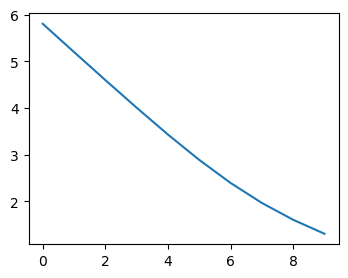

In [111]:
plt.rcParams['figure.figsize'] = (4, 3)
plt.plot(costs);

Exercise: The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction

In [176]:
def predict(w, b, X):
    m = X.shape[1]
    Y_preds = np.zeros((1, m))
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    #print('A shape:', A.shape)
    #print('A:', A)
    
    # vectorized implementation of Y_preds
    Y_preds = (A > 0.5) * 1

    assert(Y_preds.shape == (1, m))
    return Y_preds

In [177]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])
Y_preds = predict(w, b, X)
print ("predictions = " + str(Y_preds))

predictions = [[1 1 0]]


In [134]:
A

array([[0.52241976, 0.50960677, 0.34597965]])

In [135]:
A > 0.5

array([[ True,  True, False]])

Exercise: Implement the model function. Use the following notation: 
* Y_prediction_test for your predictions on the test set
* Y_prediction_train for your predictions on the train set
* w, costs, grads for the outputs of optimize()

In [162]:
def model(X_train, Y_train, X_test, Y_test, n_iters=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling all the functions we've implemented previously
    """
    n_x, m = X_train.shape   # n_x: number of inputs/features
    w, b = initialize_with_zeros(n_x)
    params, grads, costs = optimize(w, b, X_train, Y_train, n_iters=n_iters, 
                                    learning_rate=learning_rate, print_cost=print_cost)
    w = params['w']
    b = params['b']
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    train_acc = np.sum(Y_prediction_train == Y_train) / m
    test_acc = np.sum(Y_prediction_test == Y_test) / X_test.shape[1]
    print('Training set accuracy: %.5f' % (train_acc))
    print('Test set accuracy: %.5f' % (test_acc))
    result = {'costs': costs, 'Y_prediction_train': Y_prediction_train, 'Y_prediction_test': Y_prediction_test,
              'w': w, 'b': b, 'learning_rate': learning_rate, 'n_iters': n_iters}
    return result

In [230]:
result = model(train_set_x, train_set_y, test_set_x, test_set_y, n_iters=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Training set accuracy: 0.99043
Test set accuracy: 0.70000


In [185]:
test = result['Y_prediction_test'] == test_set_y
test

array([[ True,  True,  True,  True,  True, False, False,  True,  True,
         True, False, False,  True, False,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True, False, False, False,  True,  True, False, False,  True,
         True,  True,  True,  True,  True, False,  True,  True, False,
         True, False,  True,  True,  True]])

In [201]:
np.where(~test)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 5,  6, 10, 11, 13, 18, 19, 28, 29, 30, 33, 34, 41, 44, 46],
       dtype=int64))

In [188]:
test_false_indices = np.where(~test)[1]

In [189]:
test_false_indices

array([ 5,  6, 10, 11, 13, 18, 19, 28, 29, 30, 33, 34, 41, 44, 46],
      dtype=int64)

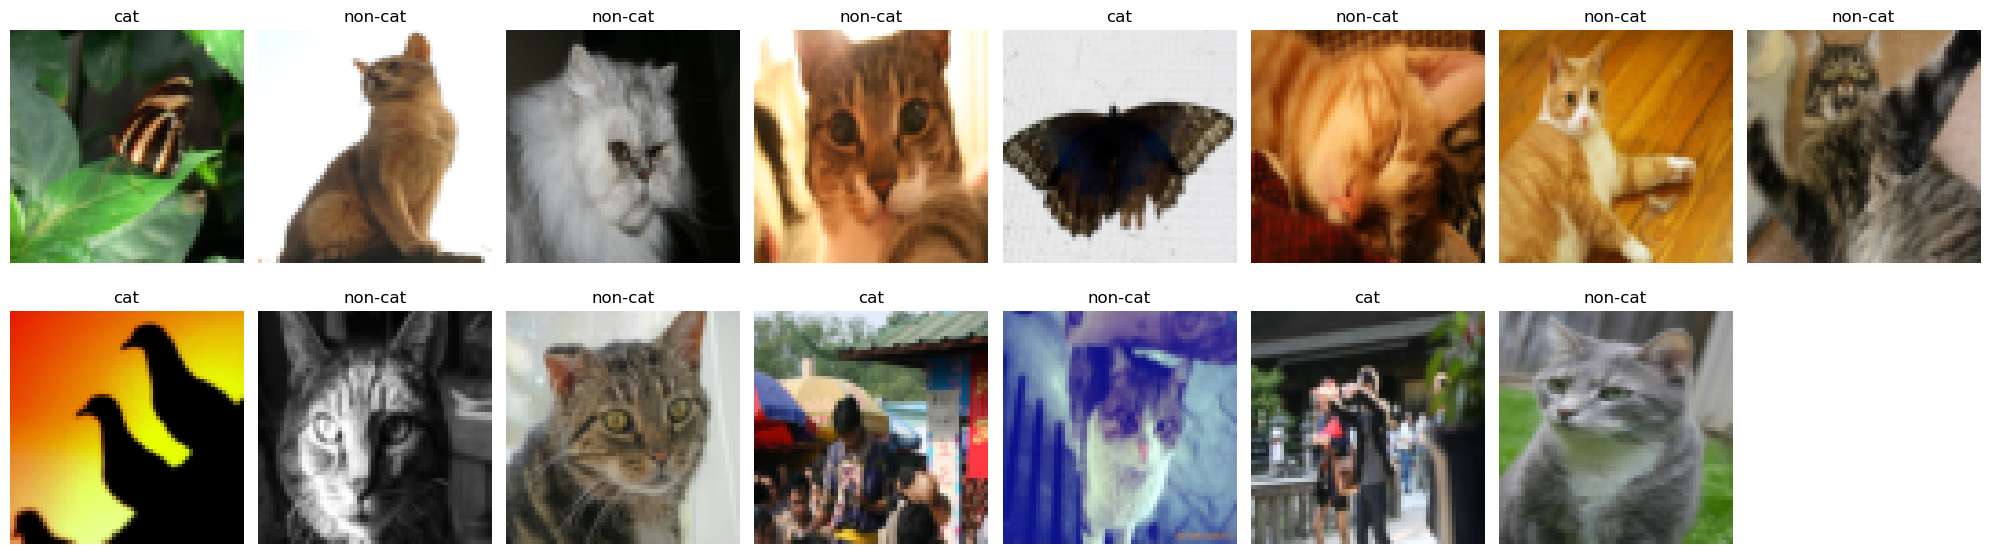

In [197]:
n = len(test_false_indices) // 2 + 1
plt.figure(figsize=(20, 6))
for i, idx in enumerate(test_false_indices):
    plt.subplot(2, n, i+1)
    plt.imshow(test_set_x[:, idx].reshape((64, 64, 3)))
    plt.title(str(classes[result['Y_prediction_test'][0, idx]].decode('utf-8')))
    plt.axis('off')
plt.tight_layout()

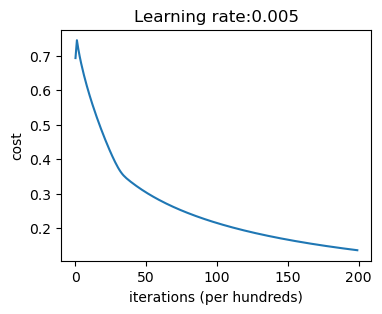

In [199]:
plt.plot(result['costs'])
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate:' + str(result['learning_rate']));

Interpretation: You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

### Choice of learning rate
In order for gradient descent to work, we must choose the learning rate wisely. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may 'overshoot' the optimal value. Similarly, if it is too small, we will need too many iterations to converge. That's why it is crucial to well-tuned our learning rate.

In [218]:
learning_rates = [0.01, 0.005, 0.001, 0.0001]
models = {}
for lr in learning_rates:
    print('learning rate:', lr)
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, n_iters=2000, learning_rate=lr)
    print()

learning rate: 0.01
Training set accuracy: 0.99522
Test set accuracy: 0.70000

learning rate: 0.005
Training set accuracy: 0.99043
Test set accuracy: 0.70000

learning rate: 0.001
Training set accuracy: 0.91388
Test set accuracy: 0.68000

learning rate: 0.0001
Training set accuracy: 0.71292
Test set accuracy: 0.40000



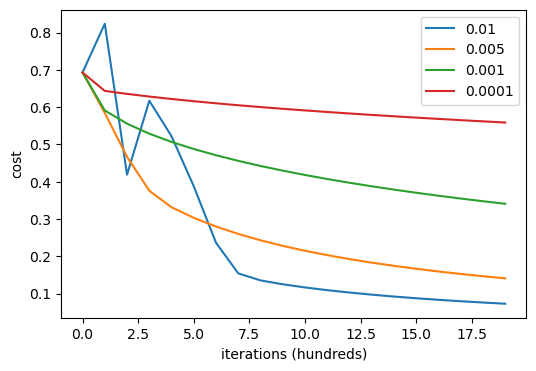

In [220]:
plt.figure(figsize=(6, 4))
for lr in learning_rates:
    plt.plot(models[str(lr)]['costs'], label=str(lr))
plt.xlabel('iterations (hundreds)')
plt.ylabel('cost')
plt.legend();

Interpretation:
* Different learning rates give different costs and thus different predictions results.
* If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
* A lower cost doesn't mean a better model. You have to check if there is possibility of overfitting. It happens when the training accuracy is a lot higher than the test accuracy.

In deep learning, we usually recommend that you: 
* Choose the learning rate that better minimizes the cost function.
* If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos)

### Test with your own image

In [226]:
import imageio.v2 as iio

In [227]:
image = iio.imread('hamster.png')

In [234]:
image.shape

(721, 1080, 3)

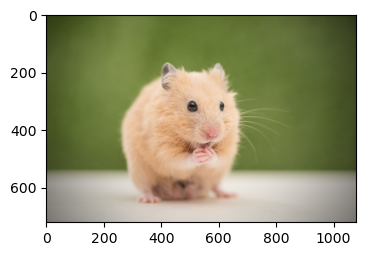

In [235]:
plt.imshow(image);

In [231]:
result = model(train_set_x, train_set_y, test_set_x, test_set_y, n_iters=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
Cost after iteration 500: 0.387709
Cost after iteration 600: 0.236254
Cost after iteration 700: 0.154222
Cost after iteration 800: 0.135328
Cost after iteration 900: 0.124971
Cost after iteration 1000: 0.116478
Cost after iteration 1100: 0.109193
Cost after iteration 1200: 0.102804
Cost after iteration 1300: 0.097130
Cost after iteration 1400: 0.092043
Cost after iteration 1500: 0.087453
Cost after iteration 1600: 0.083286
Cost after iteration 1700: 0.079487
Cost after iteration 1800: 0.076007
Cost after iteration 1900: 0.072809
Training set accuracy: 0.99522
Test set accuracy: 0.70000


In [237]:
resized_img = Image.fromarray(image).resize(size=(64, 64))

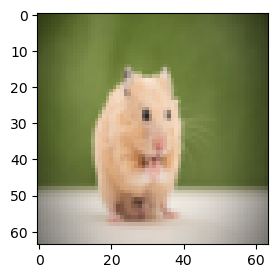

In [238]:
plt.imshow(resized_img);

In [241]:
np.array(resized_img).shape

(64, 64, 3)

In [242]:
my_image = np.array(resized_img).reshape(64*64*3, 1)

In [243]:
my_image.shape

(12288, 1)

In [244]:
predicted_image = predict(result['w'], result['b'], my_image)

In [249]:
print('The algorithm predict that your image is a "%s" picture' % classes[np.squeeze(predicted_image)].decode('utf-8'))

The algorithm predict that your image is a "non-cat" picture
